In [5]:
import pandas as pd
# Load the dataset
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')

In [7]:
# Inspect the first few rows
print(data.head())
# Summary information about columns and data types
print(data.info())
# Check for missing values
print(data.isnull().sum())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [9]:
# Fill missing values for numerical columns with median
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

# Fill missing values for categorical columns with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Check again for any remaining missing values
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:
# One-Hot Encode categorical columns
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encode 'Loan_Status' as binary (0 or 1)
data['Loan_Status'] = data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Check the transformed dataset
print(data.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002             5849                0.0       128.0             360.0   
1  LP001003             4583             1508.0       128.0             360.0   
2  LP001005             3000                0.0        66.0             360.0   
3  LP001006             2583             2358.0       120.0             360.0   
4  LP001008             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0            1         True        False         False   
1             1.0            0         True         True          True   
2             1.0            1         True         True         False   
3             1.0            1         True         True         False   
4             1.0            1         True        False         False   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employe

In [13]:
# Drop the Loan_ID column
data = data.drop(columns=['Loan_ID'])

# Convert remaining boolean columns to integers (1s and 0s)
data = data.astype(int)

# Import the StandardScaler to scale the numerical features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of columns to scale
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply scaling to the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Check the transformed dataset
print(data.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487   -0.211241          0.273231   
1        -0.134412          -0.038731   -0.211241          0.273231   
2        -0.393747          -0.554487   -0.948996          0.273231   
3        -0.462062           0.251980   -0.306435          0.273231   
4         0.097728          -0.554487   -0.056551          0.273231   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0               1            1            1            0             0   
1               1            0            1            1             1   
2               1            1            1            1             0   
3               1            1            1            1             0   
4               1            1            1            0             0   

   Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0             0              0                     

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 67.48%


In [23]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy after tuning
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validated accuracy: {best_accuracy * 100:.2f}%")

Best parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validated accuracy: 80.85%


In [24]:
# Train the model with the best parameters
final_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
final_accuracy = final_model.score(X_test, y_test) * 100
print(f"Final model accuracy on test set: {final_accuracy:.2f}%")

Final model accuracy on test set: 78.86%


In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [29]:
# Assuming 'data' is the preprocessed DataFrame from before
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier with verbosity set to 0 to suppress warnings
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 75.61%
Precision: 76.04%
Recall: 91.25%
F1 Score: 82.95%


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Accuracy: 78.05%
Precision: 75.73%
Recall: 97.50%
F1 Score: 85.25%


In [57]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your actual and predicted values
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



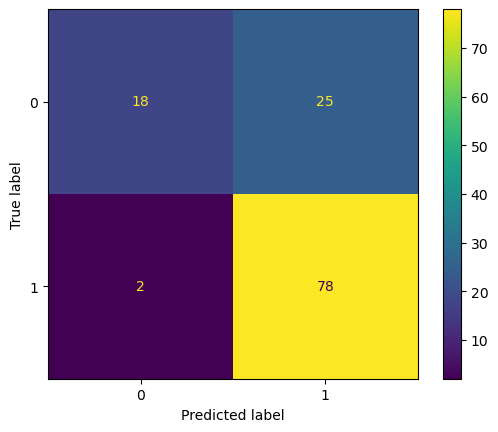

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate with balanced class weight
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_balanced.fit(X_train, y_train)

# Predict and evaluate with balanced weights
y_pred_balanced = rf_model_balanced.predict(X_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost with class weight
xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        43
           1       0.76      0.88      0.81        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train a new Random Forest model on the balanced dataset
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_smote = rf_model_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        43
           1       0.78      0.90      0.84        80

    accuracy                           0.77       123
   macro avg       0.76      0.72      0.73       123
weighted avg       0.77      0.77      0.76       123



In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [95]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [94]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [98]:
print("Best parameters found: ", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [100]:
y_pred_best = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.72      0.53      0.61        43
           1       0.78      0.89      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.76      0.76      0.75       123



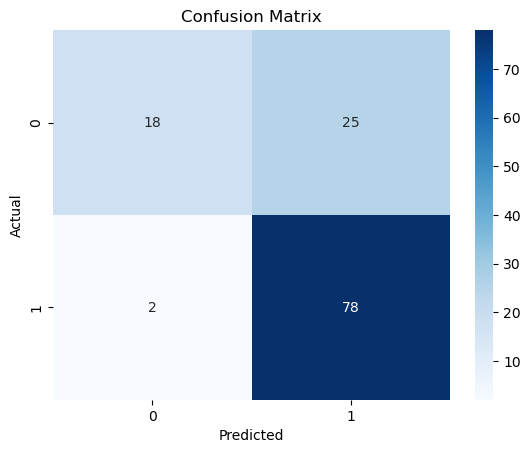

ROC AUC Score: 0.73


In [106]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for ROC AUC
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"ROC AUC Score: {roc_auc:.2f}")